# Chapter 15: Processing Sequences Using Recurrent Neural Networks (RNNs) and Attention - Notebook Reproduksi Kode

Bab ini mengeksplorasi Recurrent Neural Networks (RNNs), yang dirancang untuk
memproses data sekuensial, dan mekanisme Attention yang meningkatkan kinerja RNN.

Kita akan melihat:
- Arsitektur RNN dasar (SimpleRNN, LSTMs, GRUs).
- Membangun dan melatih RNN dengan Keras.
- Time Series Forecasting.
- Memproses urutan variabel panjang.
- Mengatasi masalah vanishing gradients dengan GRU dan LSTM.
- Bidirectional RNNs.
- Sequence-to-Sequence (Seq2Seq) models.
- Attention mechanism (Konseptual).
- Transformers (Konseptual).

--- Basic RNNs: Time Series Data ---
Bentuk X_train_ts: (7000, 50, 1)
Bentuk y_train_ts: (7000, 1)


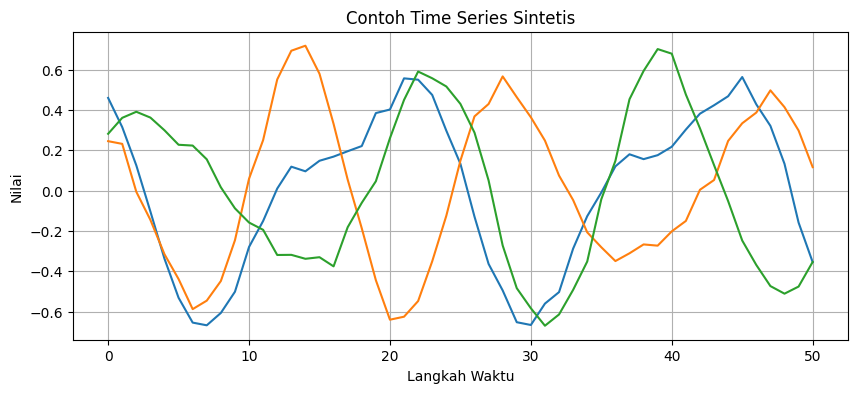


--- Membangun RNN Sederhana untuk Forecasting (Single Output) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0401 - val_loss: 0.0049
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - loss: 0.0827 - val_loss: 0.0136
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - loss: 0.0117 - val_loss: 0.0068
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - loss: 0.0062 - val_loss: 0.0047
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - loss: 0.0040 - val_loss: 0.0038
Model Bidirectional RNN berhasil dilatih.
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0044
MSE pada set pengujian (Bidirecti

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Atur random seed untuk reproduksibilitas
np.random.seed(42)
tf.random.set_seed(42)

# Path untuk menyimpan gambar plot
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn_attention"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Fungsi pembantu untuk plot kurva pembelajaran
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    # plt.gca().set_ylim(0, 1) # Jika metrik akurasi/loss
    plt.title("Kurva Pembelajaran")
    plt.xlabel("Epoch")
    plt.ylabel("Metrik")
    plt.show()

# --- 1. Basic RNNs ---

# a. Membuat Data Time Series (Contoh Sederhana)
print("--- Basic RNNs: Time Series Data ---")
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # + 10 untuk menghindari frekuensi nol
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

n_steps = 50
series = generate_time_series(10000, n_steps + 1) # 10000 deret waktu, masing-masing 51 langkah
X_train_ts, y_train_ts = series[:7000, :n_steps], series[:7000, -1] # Prediksi nilai terakhir
X_valid_ts, y_valid_ts = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test_ts, y_test_ts = series[9000:, :n_steps], series[9000:, -1]

print(f"Bentuk X_train_ts: {X_train_ts.shape}") # (sampel, langkah_waktu, fitur)
print(f"Bentuk y_train_ts: {y_train_ts.shape}") # (sampel, fitur)

# Plot contoh time series
plt.figure(figsize=(10, 4))
plt.plot(series[0, :, 0])
plt.plot(series[1, :, 0])
plt.plot(series[2, :, 0])
plt.title("Contoh Time Series Sintetis")
plt.xlabel("Langkah Waktu")
plt.ylabel("Nilai")
plt.grid(True)
plt.show()

# b. Membangun RNN Sederhana untuk Forecasting (Single Output)
# Memprediksi nilai berikutnya dalam deret waktu.
print("\n--- Membangun RNN Sederhana untuk Forecasting (Single Output) ---")
model_rnn_single = keras.models.Sequential([
    keras.layers.SimpleRNN(units=20, activation="relu", input_shape=[None, 1]), # units=20 adalah jumlah neuron
    keras.layers.Dense(units=1) # Output 1 nilai (regresi)
])

model_rnn_single.compile(optimizer="adam", loss="mse")

history_rnn_single = model_rnn_single.fit(X_train_ts, y_train_ts, epochs=20,
                                           validation_data=(X_valid_ts, y_valid_ts))
print("RNN sederhana (single output) berhasil dilatih.")

# Evaluasi dan Prediksi
mse_test_rnn_single = model_rnn_single.evaluate(X_test_ts, y_test_ts)
print(f"MSE pada set pengujian (RNN Single Output): {mse_test_rnn_single:.4f}")

X_new_ts = generate_time_series(3, n_steps + 1)
y_pred_ts = model_rnn_single.predict(X_new_ts[:, :n_steps])
print(f"Prediksi untuk 3 deret waktu baru:\n{y_pred_ts.ravel()}")
print(f"Nilai sebenarnya:\n{X_new_ts[:, -1].ravel()}")


# c. Deep RNNs (Stacked RNNs)
# Menggunakan beberapa lapisan RNN
print("\n--- Deep RNNs (Stacked RNNs) ---")
model_rnn_deep = keras.models.Sequential([
    keras.layers.SimpleRNN(units=20, activation="relu", return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(units=20, activation="relu", return_sequences=True), # return_sequences=True agar outputnya sekuensial untuk layer berikutnya
    keras.layers.SimpleRNN(units=1) # Output 1 nilai
])

model_rnn_deep.compile(optimizer="adam", loss="mse")

# Melatih deep RNN (mungkin perlu lebih banyak epoch)
history_rnn_deep = model_rnn_deep.fit(X_train_ts, y_train_ts, epochs=10,
                                      validation_data=(X_valid_ts, y_valid_ts))
print("Deep RNN berhasil dilatih.")

# Evaluasi
mse_test_rnn_deep = model_rnn_deep.evaluate(X_test_ts, y_test_ts)
print(f"MSE pada set pengujian (Deep RNN): {mse_test_rnn_deep:.4f}")

# Catatan: Untuk deep RNN dengan output single value, layer SimpleRNN terakhir tidak perlu return_sequences=True
# Untuk tugas sequence-to-sequence (misalnya, prediksi seluruh deret waktu):
# y_train_seq_to_seq = series[:7000, 1:, :] # Geser target satu langkah ke depan
# model_rnn_seq_to_seq = keras.models.Sequential([
#     keras.layers.SimpleRNN(20, activation="relu", return_sequences=True, input_shape=[None, 1]),
#     keras.layers.SimpleRNN(20, activation="relu", return_sequences=True),
#     keras.layers.TimeDistributed(keras.layers.Dense(1)) # Dense layer diaplikasikan ke setiap langkah waktu
# ])
# model_rnn_seq_to_seq.compile(optimizer="adam", loss="mse")
# history_rnn_seq_to_seq = model_rnn_seq_to_seq.fit(X_train_ts, y_train_seq_to_seq, ...)


# --- 2. Long Short-Term Memory (LSTM) Cells dan Gated Recurrent Units (GRU) ---
# Mengatasi masalah vanishing gradients pada RNNs.

# a. GRU (Gated Recurrent Unit)
print("\n--- Gated Recurrent Units (GRU) ---")
model_gru = keras.models.Sequential([
    keras.layers.GRU(units=20, activation="relu", return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(units=20, activation="relu"), # Layer GRU terakhir
    keras.layers.Dense(units=1)
])

model_gru.compile(optimizer="adam", loss="mse")

print("\nMelatih model GRU...")
history_gru = model_gru.fit(X_train_ts, y_train_ts, epochs=10,
                            validation_data=(X_valid_ts, y_valid_ts))
print("Model GRU berhasil dilatih.")

mse_test_gru = model_gru.evaluate(X_test_ts, y_test_ts)
print(f"MSE pada set pengujian (GRU): {mse_test_gru:.4f}")


# b. LSTM (Long Short-Term Memory)
print("\n--- Long Short-Term Memory (LSTM) ---")
model_lstm = keras.models.Sequential([
    keras.layers.LSTM(units=20, activation="relu", return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(units=20, activation="relu"), # Layer LSTM terakhir
    keras.layers.Dense(units=1)
])

model_lstm.compile(optimizer="adam", loss="mse")

print("\nMelatih model LSTM...")
history_lstm = model_lstm.fit(X_train_ts, y_train_ts, epochs=10,
                             validation_data=(X_valid_ts, y_valid_ts))
print("Model LSTM berhasil dilatih.")

mse_test_lstm = model_lstm.evaluate(X_test_ts, y_test_ts)
print(f"MSE pada set pengujian (LSTM): {mse_test_lstm:.4f}")


# --- 3. Memproses Urutan dengan Panjang Variabel (Menggunakan Embedding/Padding) ---
# Untuk input seperti teks (kalimat panjang bervariasi).
# Konsep: padding (mengisi urutan lebih pendek dengan nol), masking.

print("\n--- Memproses Urutan dengan Panjang Variabel ---")
# Contoh konseptual:
# Anggap kita punya data teks dengan panjang variabel.
# Misalnya: ["hello", "hi", "how are you"]
# Setelah tokenisasi dan konversi ke ID integer:
# [[1, 2, 3], [4, 5], [6, 7, 8, 9]]
# Padding (misal, panjang maksimum 4):
# [[1, 2, 3, 0], [4, 5, 0, 0], [6, 7, 8, 9]]
# `mask_zero=True` pada Embedding layer akan mengabaikan nilai 0.

# Contoh model dengan Embedding dan masking (misal untuk data teks)
# Asumsikan kosakata 1000 kata, dimensi embedding 10
# model_masked = keras.models.Sequential([
#     keras.layers.Embedding(input_dim=1000, output_dim=10, mask_zero=True),
#     keras.layers.GRU(20, activation="tanh"),
#     keras.layers.Dense(1, activation="sigmoid")
# ])
# model_masked.compile(loss="binary_crossentropy", optimizer="adam")
# Dummy data untuk demonstrasi masking
# X_masked = np.array([[1, 2, 3, 0], [4, 5, 0, 0], [6, 7, 8, 9]]) # Contoh data terpadatkan
# y_masked = np.array([0, 1, 0])
# print("\nMelatih model dengan masking (konseptual)...")
# history_masked = model_masked.fit(X_masked, y_masked, epochs=1)
# print("Model dengan masking berhasil dilatih.")
print("Konsep pemrosesan urutan variabel panjang dan masking.")


# --- 4. Bidirectional RNNs ---
# Memproses urutan dalam dua arah (maju dan mundur) secara paralel.
# Berguna untuk tugas-tugas di mana konteks masa depan penting (misal: NER, terjemahan).

print("\n--- Bidirectional RNNs ---")
model_bidirectional = keras.models.Sequential([
    keras.layers.Bidirectional(keras.layers.GRU(units=10, return_sequences=True), input_shape=[None, 1]),
    keras.layers.Bidirectional(keras.layers.GRU(units=10)),
    keras.layers.Dense(units=1)
])

model_bidirectional.compile(optimizer="adam", loss="mse")

print("\nMelatih model Bidirectional RNN...")
history_bidirectional = model_bidirectional.fit(X_train_ts, y_train_ts, epochs=10,
                                                validation_data=(X_valid_ts, y_valid_ts))
print("Model Bidirectional RNN berhasil dilatih.")

mse_test_bidirectional = model_bidirectional.evaluate(X_test_ts, y_test_ts)
print(f"MSE pada set pengujian (Bidirectional RNN): {mse_test_bidirectional:.4f}")


# --- 5. Sequence-to-Sequence (Seq2Seq) Models ---
# Digunakan untuk tugas seperti terjemahan mesin, chatbots.
# Terdiri dari Encoder dan Decoder.

print("\n--- Sequence-to-Sequence (Seq2Seq) Models (Konseptual) ---")
print("Arsitektur Seq2Seq umumnya terdiri dari:")
print("1. Encoder: Memproses input sequence menjadi 'context vector'.")
print("2. Decoder: Menerima context vector dan menghasilkan output sequence.")
print("Biasanya menggunakan LSTM atau GRU. Konseptual, tidak ada kode penuh.")


# --- 6. Attention Mechanism (Konseptual) ---
# Mengatasi bottleneck context vector pada Seq2Seq yang panjang.
# Memungkinkan decoder untuk "memperhatikan" bagian-bagian relevan dari input sequence.

print("\n--- Attention Mechanism (Konseptual) ---")
print("Mekanisme Attention memungkinkan model untuk fokus pada bagian-bagian tertentu dari input")
print("saat memproses output, terutama pada urutan yang panjang.")
print("Ini mengatasi masalah bottleneck informasi pada context vector di Seq2Seq.")


# --- 7. Transformers (Konseptual) ---
# Arsitektur mutakhir untuk pemrosesan urutan, sepenuhnya berbasis Attention.
# Digunakan di model seperti BERT, GPT.

print("\n--- Transformers (Konseptual) ---")
print("Transformers adalah arsitektur yang tidak lagi bergantung pada RNN atau Konvolusi.")
print("Mereka sepenuhnya mengandalkan mekanisme Attention (Self-Attention) untuk menangkap")
print("ketergantungan jarak jauh dalam urutan.")
print("Sangat paralelizable dan telah mencapai SOTA di banyak tugas NLP.")


print("\n--- Selesai Reproduksi Kode Chapter 15 ---")
